In [30]:
import numpy as np
import matplotlib.pyplot as plt

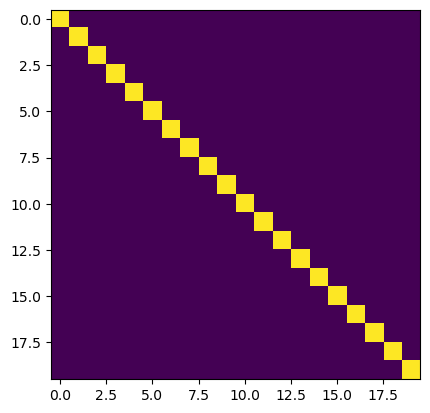

In [136]:
im = np.ones(20*20).reshape(20,20) + np.eye(20)
plt.imshow(im)

In [138]:
im = np.random.randint(0,255, (20,20))

In [92]:
def global_contrast(array):
    return 1/255 * (array.max() - array.min())

In [142]:
def local_contrast(array):

    contrast = []
    for i in range(1, array.shape[0]-1):
        for j in range(1, array.shape[1]-1):
                
                arr = array[i-1:i+2,j-1:j+2][(np.eye(3)+np.eye(3)[:,::-1])==0]
                con = array[i,j] - arr
                contrast.append(con)
    return np.array(contrast).mean()

In [134]:
local_contrast(np.ones(10*10).reshape(10,-1))

0.0

In [141]:
print(f"Local contrast:{local_contrast(im)}")
print(f"Global contrast:{global_contrast(im)}")

Local contrast:1.3294753086419753
Global contrast:0.996078431372549


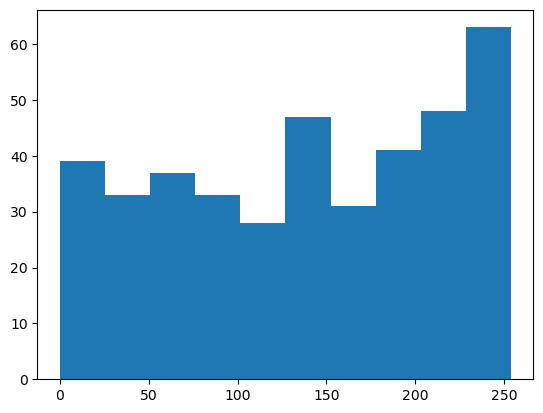

In [36]:
plt.hist(im.reshape(-1));